# 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [ ]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


# 데이터 확인하기

In [ ]:
train.columns, test.columns

(Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age', 'Calories_Burned'],
       dtype='object'),
 Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age'],
       dtype='object'))

In [ ]:
# 결측치확인하기
train.isna().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [ ]:
test.isna().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
dtype: int64

# 컬럼들 변경하기

In [ ]:
train_test = [train,test]
train_test

[              ID  Exercise_Duration  Body_Temperature(F)    BPM  Height(Feet)  \
 0     TRAIN_0000               26.0                105.6  107.0           5.0   
 1     TRAIN_0001                7.0                103.3   88.0           6.0   
 2     TRAIN_0002                7.0                103.3   86.0           6.0   
 3     TRAIN_0003               17.0                104.0   99.0           5.0   
 4     TRAIN_0004                9.0                102.7   88.0           5.0   
 ...          ...                ...                  ...    ...           ...   
 7495  TRAIN_7495               22.0                105.1  104.0           4.0   
 7496  TRAIN_7496               20.0                105.3  104.0           5.0   
 7497  TRAIN_7497                8.0                103.1   90.0           6.0   
 7498  TRAIN_7498               12.0                104.4   97.0           5.0   
 7499  TRAIN_7499               16.0                104.9   91.0           5.0   
 
       Height(

In [ ]:
train.columns, test.columns

(Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age', 'Calories_Burned'],
       dtype='object'),
 Index(['ID', 'Exercise_Duration', 'Body_Temperature(F)', 'BPM', 'Height(Feet)',
        'Height(Remainder_Inches)', 'Weight(lb)', 'Weight_Status', 'Gender',
        'Age'],
       dtype='object'))

In [ ]:
# 온도 화씨 -> 섭씨 함수
def fahrenheit_to_celsius(f):
    c = (f - 32) * 5/9
    return c

# 신장 컬럼을 하나로 만들기 위해 feet, inch를 cm로 변환하는 함수
def feet_inch_to_cm(feet, inch):
    cm = feet * 30.48 + inch * 2.54
    return cm

# 파운드를 kg으로 변환하는 함수
def pounds_to_kg(lb):
    kg = lb * 0.453592
    return kg

In [ ]:
for df in train_test:
    df['Body_Temperature'] = df['Body_Temperature(F)'].apply(fahrenheit_to_celsius)
    

In [ ]:
for df in train_test:
    df['Height'] = df.apply(lambda x: feet_inch_to_cm(x['Height(Feet)'],
                                                      x['Height(Remainder_Inches)']), axis = 1)

In [ ]:
for df in train_test:
    df['Weight'] = df['Weight(lb)'].apply(pounds_to_kg)

In [ ]:
# 변환 이전의 컬럼은 drop!
drop_col = ['Body_Temperature(F)','Height(Feet)','Height(Remainder_Inches)','Weight(lb)']

In [ ]:
# inplace를 꼭써야 하나? why?
for df in train_test:
    df = df.drop(columns=drop_col,inplace = True)

In [ ]:
# 1. gender 카테고리화
train['Gender'] = train['Gender'].astype('category')
test['Gender'] = test['Gender'].astype('category')



In [ ]:
# 기술 통계량 확인
train.describe()

,Exercise_Duration,BPM,Age,Calories_Burned,Body_Temperature,Height,Weight
count,7500.0000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.5012,95.498133,42.636000,89.373467,40.018652,174.506128,75.006511
std,8.3553,9.587331,16.883188,62.817086,0.784914,14.318365,15.108304
min,1.0000,69.000000,20.000000,1.000000,37.111111,121.920000,36.015205
25%,8.0000,88.000000,28.000000,35.000000,39.611111,165.100000,63.003929
50%,15.0000,95.000000,39.000000,77.000000,40.222222,175.260000,73.980855
75%,23.0000,103.000000,56.000000,138.000000,40.611111,185.420000,86.998946
max,30.0000,128.000000,79.000000,300.000000,41.500000,218.440000,131.995272


In [ ]:
test.describe()

,Exercise_Duration,BPM,Age,Body_Temperature,Height,Weight
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,15.560000,95.538933,42.943600,40.032333,174.446523,74.927689
std,8.283402,9.579919,17.076529,0.773314,14.223519,14.962488
min,1.000000,67.000000,20.000000,37.222222,132.080000,38.011010
25%,8.000000,88.000000,28.000000,39.611111,165.100000,63.003929
50%,16.000000,96.000000,40.000000,40.222222,175.260000,73.980855
75%,23.000000,103.000000,56.000000,40.611111,185.420000,86.998946
max,30.000000,123.000000,79.000000,41.500000,220.980000,128.003662


array([[<Axes: title={'center': 'Exercise_Duration'}>,
        <Axes: title={'center': 'BPM'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Calories_Burned'}>,
        <Axes: title={'center': 'Body_Temperature'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >, <Axes: >]],
      dtype=object)

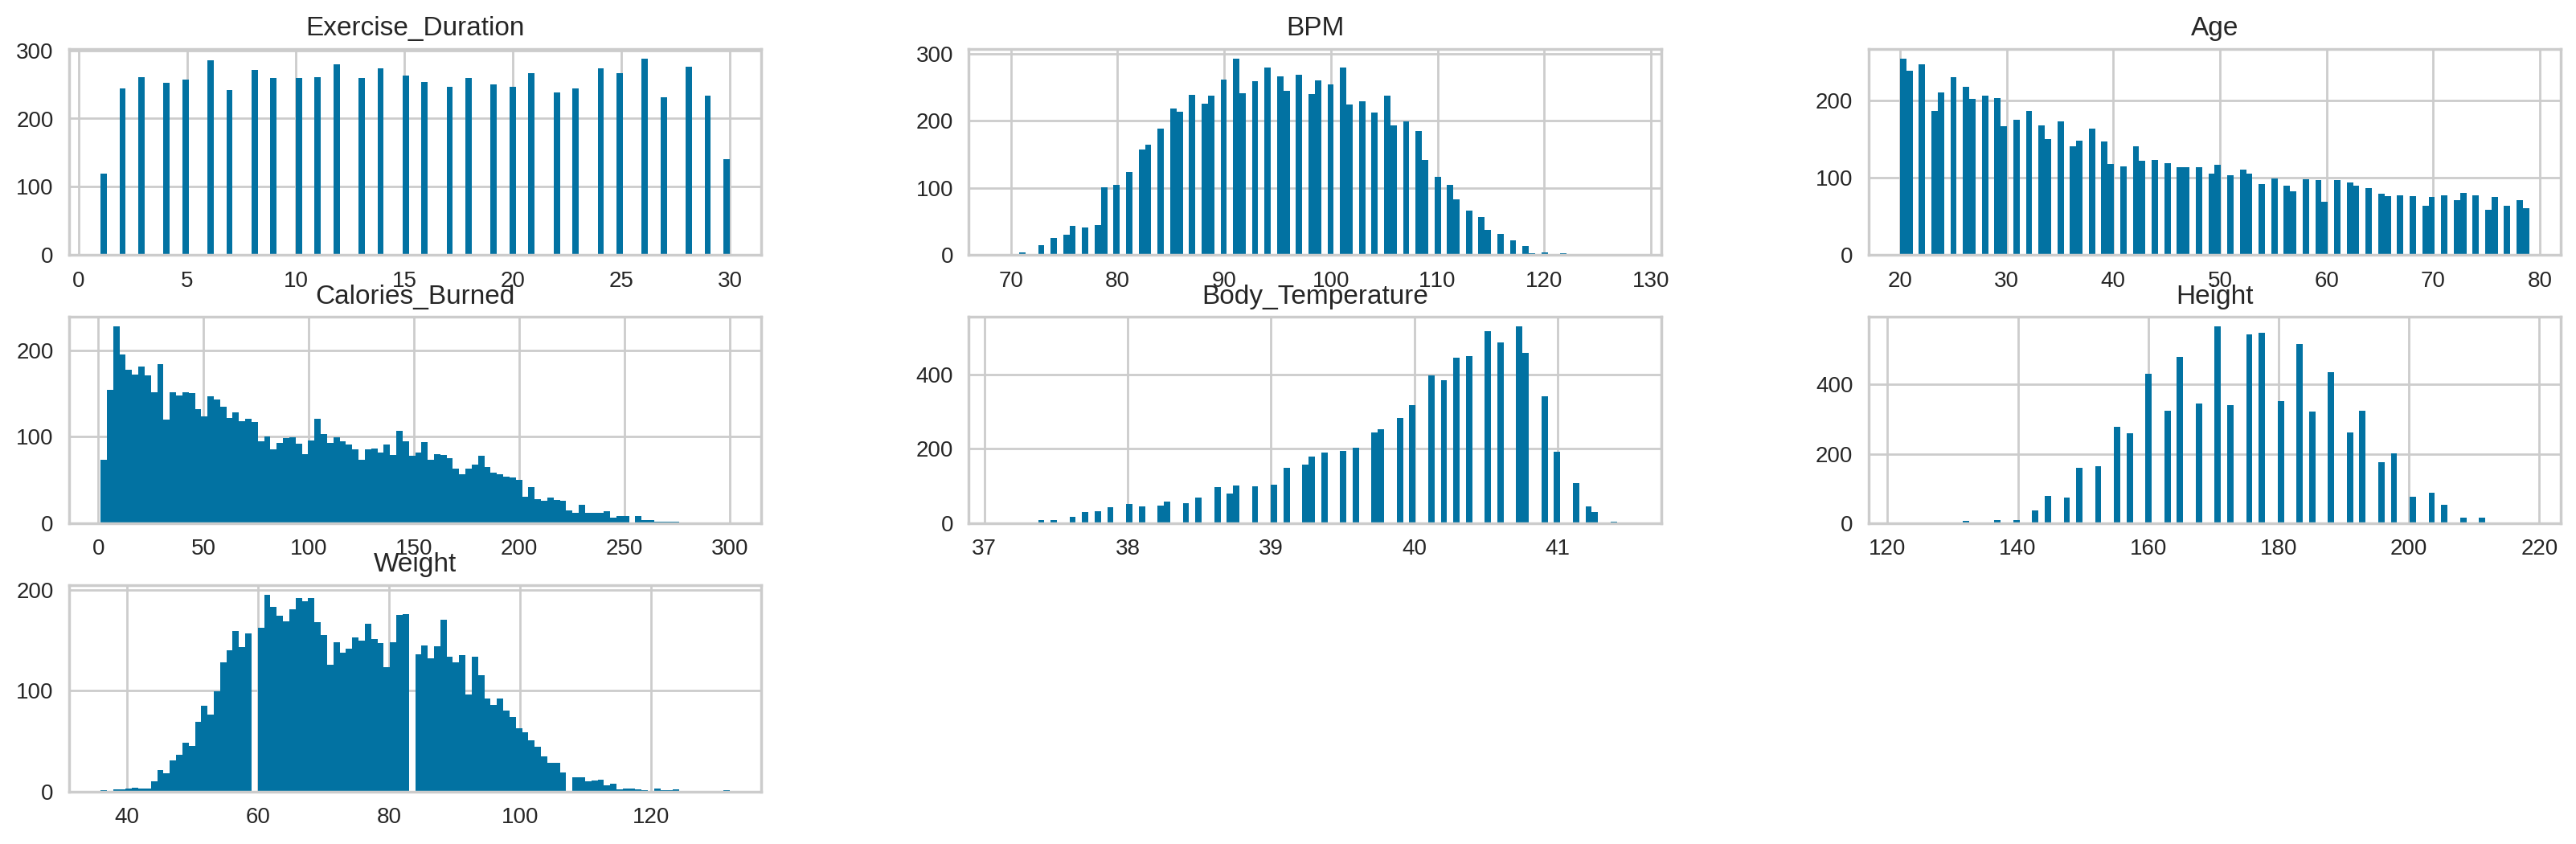

In [ ]:
# 히스토그램 확인하기
train.hist(figsize=(20,6), bins = 100)

In [ ]:
# 상관관계 확인하기
train.corr().style.background_gradient()

,Exercise_Duration,BPM,Age,Calories_Burned,Body_Temperature,Height,Weight
Exercise_Duration,1.000000,0.853489,0.017734,0.954783,0.904314,-0.003146,0.002236
BPM,0.853489,1.000000,0.014702,0.899900,0.770707,0.006319,0.012562
Age,0.017734,0.014702,1.000000,0.159624,0.016474,0.011184,0.090536
Calories_Burned,0.954783,0.899900,0.159624,1.000000,0.824379,0.021906,0.042568
Body_Temperature,0.904314,0.770707,0.016474,0.824379,1.000000,0.002979,0.007554
Height,-0.003146,0.006319,0.011184,0.021906,0.002979,1.000000,0.957816
Weight,0.002236,0.012562,0.090536,0.042568,0.007554,0.957816,1.000000


In [ ]:
# 다중공선성 확인하기
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 종속 변수와 독립 변수 분리
X = train[['Exercise_Duration', 'BPM', 'Body_Temperature', 'Height', 'Weight']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

print(vif)

    VIF Factor           features
0    13.840548  Exercise_Duration
1   362.002699                BPM
2   961.217016   Body_Temperature
3  1728.904449             Height
4   298.661792             Weight


오늘 알게된 내용

컬럼(피처) - 미국식 표기법으로 되어있었다 -> 한국식으로 바꿈

각 변수간의 상관관계를 확인해보았다.

칼로리 소모량(목표변수)
    - 높은 상관관계 : 운동시간(0.954783), 심박수(0.899900), 체온(0.824379)
    - 낮은 상관관계 : 신장(0.021906), 체중(0.042568), 나이(0.159624)
        
다중공선성(VIF)
    - 10이상의 매우 높은 값들 : 체온과 심박수 -  136.019228
                           신장과 체중 - 66.871604
    

In [ ]:
train.columns, test.columns

(Index(['ID', 'Exercise_Duration', 'BPM', 'Weight_Status', 'Gender', 'Age',
        'Calories_Burned', 'Body_Temperature', 'Height', 'Weight'],
       dtype='object'),
 Index(['ID', 'Exercise_Duration', 'BPM', 'Weight_Status', 'Gender', 'Age',
        'Body_Temperature', 'Height', 'Weight'],
       dtype='object'))

In [ ]:
train.columns

Index(['ID', 'Exercise_Duration', 'BPM', 'Weight_Status', 'Gender', 'Age',
       'Calories_Burned', 'Body_Temperature', 'Height', 'Weight'],
      dtype='object')

In [ ]:
# 파생변수 만들기
train['BMI'] = train['Weight'] /( train['Height'] / 100)**2
test['BMI'] = test['Weight'] /( test['Height'] / 100)**2

In [ ]:
train

,ID,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Body_Temperature,Height,Weight,BMI
0,TRAIN_0000,26.0,107.0,Normal Weight,F,45,166.0,40.888889,175.26,69.989246,22.785874
1,TRAIN_0001,7.0,88.0,Overweight,M,50,33.0,39.611111,198.12,102.012841,25.989517
2,TRAIN_0002,7.0,86.0,Overweight,M,29,23.0,39.611111,190.50,99.019134,27.285327
3,TRAIN_0003,17.0,99.0,Normal Weight,F,33,91.0,40.000000,167.64,66.995538,23.839140
4,TRAIN_0004,9.0,88.0,Normal Weight,M,38,32.0,39.277778,177.80,77.019922,24.363493
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,22.0,104.0,Normal Weight,F,75,151.0,40.611111,147.32,50.983741,23.491366
7496,TRAIN_7496,20.0,104.0,Normal Weight,F,21,114.0,40.722222,172.72,66.995538,22.457459
7497,TRAIN_7497,8.0,90.0,Overweight,M,57,41.0,39.500000,187.96,91.988458,26.037691
7498,TRAIN_7498,12.0,97.0,Overweight,M,35,57.0,40.222222,175.26,76.022019,24.749919


In [ ]:
# 카디오 효율성 지수 :  CEI = 심박수 / 체온입니다. CEI가 높을수록 운동 효율성이 높다
train['CEI'] = train['BPM'] / train['Body_Temperature']
test['CEI'] = test['BPM'] / test['Body_Temperature']

In [ ]:
# for df in train_test:
#     df = df.drop(columns=['BPM', 'Body_Temperature', 'Height','Weight'],inplace=True)

In [ ]:
# 성별 : 남자 0, 여자 1
train['Gender'] = train['Gender'].apply(lambda x: 0 if x == '남자' else 1)
test['Gender'] = test['Gender'].apply(lambda x: 0 if x == '남자' else 1)

In [ ]:
# 나이 컬럼 범주화
def age_category(age):
    if age < 20:
        return 0
    elif age < 30:
        return 1
    elif age < 40:
        return 2
    elif age < 50:
        return 3
    elif age < 60:
        return 4
    elif age < 70:
        return 5
    else:
        return 6

In [ ]:
train['Age'] = train['Age'].apply(age_category)
test['Age'] = test['Age'].apply(age_category)


In [ ]:
train = train.drop(columns='ID')
test = test.drop(columns='ID')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Exercise_Duration  7500 non-null   float64
 1   BPM                7500 non-null   float64
 2   Weight_Status      7500 non-null   object 
 3   Gender             7500 non-null   int64  
 4   Age                7500 non-null   int64  
 5   Calories_Burned    7500 non-null   float64
 6   Body_Temperature   7500 non-null   float64
 7   Height             7500 non-null   float64
 8   Weight             7500 non-null   float64
 9   BMI                7500 non-null   float64
 10  CEI                7500 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 644.7+ KB


In [ ]:
train['Weight_Status'].unique()

array(['Normal Weight', 'Overweight', 'Obese'], dtype=object)

In [ ]:
# 체중상태에 대해서도 범주화 진행
def weight_status(weight_status):
    if weight_status == 'Normal Weight':
        return 0
    elif weight_status == 'Overweight':
        return 1
    elif weight_status == 'Obese':
        return 2

In [ ]:
train['Weight_Status'] = train['Weight_Status'].apply(weight_status)
test['Weight_Status'] = test['Weight_Status'].apply(weight_status)

In [ ]:
train

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Body_Temperature,Height,Weight,BMI,CEI
0,26.0,107.0,0,1,3,166.0,40.888889,175.26,69.989246,22.785874,2.616848
1,7.0,88.0,1,1,4,33.0,39.611111,198.12,102.012841,25.989517,2.221599
2,7.0,86.0,1,1,1,23.0,39.611111,190.50,99.019134,27.285327,2.171108
3,17.0,99.0,0,1,2,91.0,40.000000,167.64,66.995538,23.839140,2.475000
4,9.0,88.0,0,1,2,32.0,39.277778,177.80,77.019922,24.363493,2.240453
...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,104.0,0,1,6,151.0,40.611111,147.32,50.983741,23.491366,2.560876
7496,20.0,104.0,0,1,1,114.0,40.722222,172.72,66.995538,22.457459,2.553888
7497,8.0,90.0,1,1,4,41.0,39.500000,187.96,91.988458,26.037691,2.278481
7498,12.0,97.0,1,1,2,57.0,40.222222,175.26,76.022019,24.749919,2.411602


In [ ]:
test

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Body_Temperature,Height,Weight,BMI,CEI
0,26.0,107.0,0,1,3,40.611111,154.94,51.981643,21.653241,2.634747
1,29.0,111.0,1,1,1,40.500000,187.96,89.992653,25.472770,2.740741
2,11.0,90.0,0,1,4,40.000000,175.26,77.019922,25.074799,2.250000
3,24.0,108.0,1,1,2,40.777778,182.88,88.994750,26.609209,2.648501
4,29.0,116.0,0,1,5,41.111111,170.18,66.995538,23.132834,2.821622
...,...,...,...,...,...,...,...,...,...,...
7495,28.0,106.0,0,1,4,40.888889,182.88,81.011531,24.222246,2.592391
7496,4.0,84.0,1,1,1,38.888889,177.80,83.007336,26.257475,2.160000
7497,24.0,97.0,0,1,3,40.611111,157.48,59.012319,23.795338,2.388509
7498,8.0,83.0,0,1,3,39.500000,165.10,61.008124,22.381723,2.101266


In [ ]:
train

,Exercise_Duration,BPM,Weight_Status,Gender,Age,Calories_Burned,Body_Temperature,Height,Weight,BMI,CEI
0,26.0,107.0,0,1,3,166.0,40.888889,175.26,69.989246,22.785874,2.616848
1,7.0,88.0,1,1,4,33.0,39.611111,198.12,102.012841,25.989517,2.221599
2,7.0,86.0,1,1,1,23.0,39.611111,190.50,99.019134,27.285327,2.171108
3,17.0,99.0,0,1,2,91.0,40.000000,167.64,66.995538,23.839140,2.475000
4,9.0,88.0,0,1,2,32.0,39.277778,177.80,77.019922,24.363493,2.240453
...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,104.0,0,1,6,151.0,40.611111,147.32,50.983741,23.491366,2.560876
7496,20.0,104.0,0,1,1,114.0,40.722222,172.72,66.995538,22.457459,2.553888
7497,8.0,90.0,1,1,4,41.0,39.500000,187.96,91.988458,26.037691,2.278481
7498,12.0,97.0,1,1,2,57.0,40.222222,175.26,76.022019,24.749919,2.411602


In [ ]:
label = 'Calories_Burned'

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pycaret.regression import *

reg_test_ln = setup(data=train,
                   target=label,
                   train_size= 0.85,
                   fold=5)


,Description,Value
0,Session id,3972
1,Target,Calories_Burned
2,Target type,Regression
3,Original data shape,"(7500, 11)"
4,Transformed data shape,"(7500, 13)"
5,Transformed train set shape,"(6375, 13)"
6,Transformed test set shape,"(1125, 13)"
7,Ordinal features,1
8,Numeric features,7
9,Categorical features,3


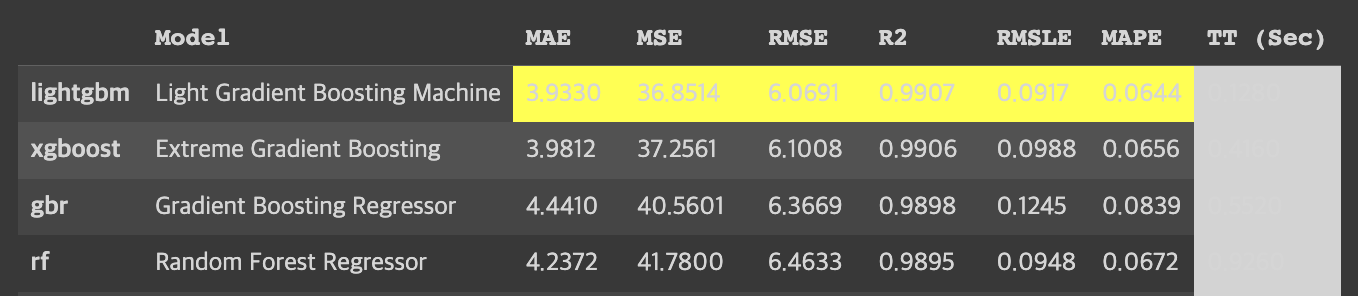

In [ ]:
best = compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.6230,6.4171,2.5234,0.9984,0.0504,0.0303,0.2960
xgboost,Extreme Gradient Boosting,1.7904,7.0146,2.6443,0.9982,0.0462,0.0307,0.5360
et,Extra Trees Regressor,2.0351,10.7914,3.2743,0.9973,0.0502,0.0326,1.2280
gbr,Gradient Boosting Regressor,2.7535,15.0963,3.8846,0.9961,0.1252,0.0675,0.9960
rf,Random Forest Regressor,2.4002,15.4424,3.9146,0.9961,0.0564,0.0377,2.2080
dt,Decision Tree Regressor,4.5176,47.0519,6.8499,0.9880,0.0877,0.0624,0.2120
knn,K Neighbors Regressor,6.7884,90.7669,9.5210,0.9769,0.2184,0.1683,0.2200
br,Bayesian Ridge,8.3188,126.8897,11.2514,0.9677,0.3858,0.2897,0.2440
ridge,Ridge Regression,8.3192,126.8992,11.2519,0.9677,0.3859,0.2895,0.2180
lr,Linear Regression,8.3193,126.9014,11.2520,0.9677,0.3859,0.2895,0.2320


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
best_tune = tune_model(best)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9511,9.8231,3.1342,0.9977,0.0690,0.0430
1,1.7802,6.8545,2.6181,0.9982,0.0599,0.0351
2,1.7976,7.8702,2.8054,0.9980,0.0576,0.0345
3,1.8708,8.3340,2.8869,0.9979,0.0681,0.0404
4,1.8349,9.0578,3.0096,0.9976,0.0677,0.0373
Mean,1.8469,8.3879,2.8908,0.9979,0.0645,0.0380
Std,0.0607,1.0130,0.1761,0.0002,0.0047,0.0032


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
predict_model(best_tune)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,1.4948,5.5941,2.3652,0.9986,0.0474,0.0281


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned,prediction_label
3445,TRAIN_3445,2.0,100.900002,87.0,5.0,3.0,119.000000,Normal Weight,F,32,8.0,9.553663
1670,TRAIN_1670,4.0,102.599998,85.0,5.0,11.0,198.399994,Overweight,M,61,18.0,18.162989
2832,TRAIN_2832,19.0,105.300003,97.0,5.0,8.0,143.300003,Normal Weight,F,35,99.0,96.698428
6571,TRAIN_6571,22.0,105.400002,97.0,5.0,6.0,141.100006,Normal Weight,F,46,119.0,118.653773
1739,TRAIN_1739,28.0,105.300003,107.0,5.0,9.0,178.600006,Overweight,M,22,162.0,161.260578
...,...,...,...,...,...,...,...,...,...,...,...,...
7143,TRAIN_7143,30.0,105.099998,101.0,5.0,11.0,187.399994,Overweight,M,51,191.0,180.585431
2185,TRAIN_2185,26.0,106.199997,115.0,5.0,9.0,174.199997,Overweight,M,43,207.0,208.111382
1991,TRAIN_1991,17.0,104.699997,107.0,5.0,5.0,136.699997,Normal Weight,F,50,112.0,114.496858
758,TRAIN_0758,25.0,105.800003,109.0,5.0,7.0,160.899994,Obese,M,77,214.0,218.085256


In [ ]:
predict = predict_model(best_tune, data= test)

In [ ]:
submission['Calories_Burned'] = predict['prediction_label']
submission.to_csv('auto3.csv',index = False)

In [ ]:
submission.to_csv('lgbm2.csv',index = False)